In [25]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import csv
import json

In [26]:
df = pd.read_csv("Player Per Game.csv")
df.dropna()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
501,29708,2022,4910,Brandon Williams,1999.0,PG,22.0,1,NBA,POR,...,0.701,0.8,2.3,3.1,3.9,1.0,0.4,2.4,2.2,12.9
706,29913,2022,4619,George King,1994.0,SF,28.0,2,NBA,DAL,...,0.500,0.0,1.3,1.3,0.0,0.0,0.0,0.3,1.0,0.3
1732,29422,2021,4548,Mike James,1990.0,PG,30.0,2,NBA,BRK,...,0.778,0.2,2.2,2.5,4.2,0.5,0.1,1.5,0.8,7.7
3774,27377,2018,4548,Mike James,1990.0,PG,27.0,1,NBA,TOT,...,0.762,0.4,2.1,2.5,3.5,0.8,0.2,1.4,1.3,9.3
3775,27378,2018,4548,Mike James,1990.0,PG,27.0,1,NBA,PHO,...,0.762,0.4,2.4,2.8,3.8,0.8,0.2,1.5,1.4,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,8078,1980,1092,Don Chaney,1946.0,SG,33.0,12,NBA,BOS,...,0.762,0.5,0.7,1.2,0.6,0.5,0.2,0.6,1.3,2.8
22669,8111,1980,1864,Gerald Henderson,1956.0,PG,24.0,1,NBA,BOS,...,0.690,0.5,0.6,1.1,1.9,0.6,0.2,1.4,1.3,6.2
22734,8176,1980,1381,Julius Erving,1950.0,SF,29.0,9,NBA,PHI,...,0.787,2.8,4.6,7.4,4.6,2.2,1.8,3.6,2.7,26.9
22762,8204,1980,1671,M.L. Carr,1951.0,SF,29.0,5,NBA,BOS,...,0.739,1.3,2.7,4.0,1.9,1.5,0.4,1.7,2.6,11.1


In [27]:
df1 = df.loc[df['player'] == "Blake Griffin"]
bg = df1[['season', 'pts_per_game']].copy()
bg.sort_values('season')

,season,pts_per_game
7597,2011,22.5
7030,2012,20.7
6462,2013,18.0
5867,2014,24.1
5218,2015,21.9
4623,2016,21.4
4033,2017,21.6
3363,2018,19.8
3362,2018,22.6
3361,2018,21.4


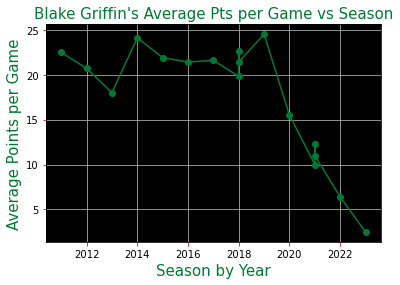

In [35]:
plt.plot(bg['season'], bg['pts_per_game'], marker = 'o', color = '#007A33')
plt.title("Blake Griffin's Average Pts per Game vs Season", fontsize = 15, color = '#007A33')
plt.xlabel('Season by Year', fontsize = 15, color = '#007A33')
plt.ylabel('Average Points per Game', fontsize = 15, color = '#007A33')
plt.grid()
ax = plt.gca()
ax.set_facecolor('black')
ax.tick_params(axis = 'both', color = 'red')

In [18]:
df3 = pd.read_csv('Team Stats Per Game.csv')
df3.dropna()


,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2023,NBA,Atlanta Hawks,ATL,False,7.0,240.0,44.0,91.4,0.481,...,0.821,9.7,33.0,42.7,25.6,6.7,6.0,12.6,22.4,116.0
1,2023,NBA,Boston Celtics,BOS,False,6.0,244.2,40.7,84.8,0.479,...,0.852,8.0,32.3,40.3,24.7,5.8,5.7,13.8,22.3,116.7
2,2023,NBA,Brooklyn Nets,BRK,False,7.0,243.6,40.9,85.3,0.479,...,0.805,9.0,30.0,39.0,24.7,7.3,8.6,14.0,23.4,113.9
3,2023,NBA,Chicago Bulls,CHI,False,7.0,240.0,39.4,87.0,0.453,...,0.845,11.3,32.3,43.6,23.7,9.4,4.7,14.4,20.3,112.7
4,2023,NBA,Charlotte Hornets,CHO,False,7.0,247.1,43.9,93.1,0.471,...,0.723,11.3,34.7,46.0,28.4,6.9,5.3,14.9,21.4,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1974,ABA,New York Nets,NYA,True,84.0,241.5,45.9,95.7,0.480,...,0.754,15.9,33.0,48.9,24.1,9.9,6.8,19.2,23.6,109.4
1418,1974,ABA,San Antonio Spurs,SAA,True,84.0,242.4,39.8,87.5,0.455,...,0.778,14.7,31.5,46.2,21.5,7.1,2.7,15.8,26.2,97.6
1419,1974,ABA,San Diego Conquistadors,SDA,True,84.0,241.5,46.5,105.1,0.443,...,0.753,17.0,32.6,49.6,23.6,8.3,6.1,15.7,19.5,113.2
1421,1974,ABA,Utah Stars,UTS,True,84.0,241.8,42.7,88.4,0.483,...,0.789,13.7,31.4,45.2,22.3,8.4,4.2,17.0,23.1,105.1


In [19]:
df4 = df3.loc[df3['team'] == "Boston Celtics"]
bcs = df4[['season', 'pts_per_game']].copy()
bcs.sort_values('season')

,season,pts_per_game
1802,1947,60.1
1794,1948,68.8
1781,1949,76.6
1764,1950,79.7
1751,1951,85.2
...,...,...
125,2019,112.4
94,2020,113.7
63,2021,112.6
32,2022,111.8


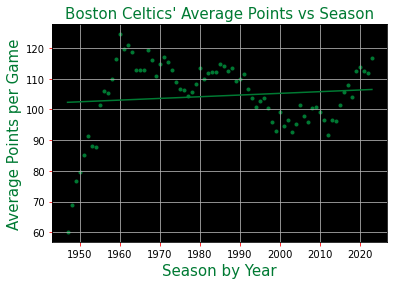

In [31]:
plt.scatter(bcs['season'], bcs['pts_per_game'], marker = '.', color = '#007A33')
plt.title("Boston Celtics' Average Points vs Season", fontsize = 15, color = '#007A33')
plt.xlabel("Season by Year", fontsize = 15, color = '#007A33')
plt.ylabel('Average Points per Game', fontsize = 15, color = '#007A33')
plt.grid()
x = bcs['season'].values
s = pd.Series(bcs['pts_per_game'].values, x)
X = sm.add_constant(x)
model = sm.OLS(s, X)
result = model.fit()
y = result.params.loc['x1'] * x + result.params.loc['const']
plt.plot(x, y, color = '#007A33')
ax = plt.gca()
ax.set_facecolor('black')
ax.tick_params(axis = 'both', color = 'red')

In [32]:
df5 = pd.read_csv('Team Summaries.csv')
df5.dropna()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2023,NBA,Atlanta Hawks,ATL,False,25.5,4.0,3.0,3.0,4.0,...,11.1,22.4,0.194,0.525,11.5,72.2,0.250,State Farm Arena,53083.0,17694.0
1,2023,NBA,Boston Celtics,BOS,False,27.6,4.0,2.0,3.0,3.0,...,12.7,19.1,0.226,0.532,10.8,74.9,0.212,TD Garden,57468.0,19156.0
2,2023,NBA,Brooklyn Nets,BRK,False,28.8,2.0,5.0,2.0,5.0,...,12.6,21.3,0.250,0.556,13.4,70.2,0.224,Barclays Center,87276.0,17455.0
3,2023,NBA,Chicago Bulls,CHI,False,28.0,3.0,4.0,3.0,4.0,...,12.7,24.6,0.269,0.564,15.9,79.9,0.201,United Center,76078.0,19020.0
4,2023,NBA,Charlotte Hornets,CHO,False,26.2,3.0,4.0,4.0,3.0,...,12.5,24.4,0.184,0.512,12.1,74.8,0.222,Spectrum Center,50386.0,16795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1982,NBA,New Jersey Nets,NJN,True,25.1,44.0,38.0,43.0,39.0,...,16.6,33.7,0.237,0.486,18.3,67.0,0.281,Brendan Byrne Arena,560734.0,13526.0
1226,1981,NBA,Denver Nuggets,DEN,False,26.8,37.0,45.0,40.0,42.0,...,13.4,33.1,0.300,0.509,14.6,65.4,0.232,McNichols Sports Arena,423287.0,15252.0
1234,1981,NBA,New Jersey Nets,NJN,False,25.2,24.0,58.0,26.0,56.0,...,16.6,30.4,0.243,0.506,16.4,69.2,0.281,Rutgers Athletic Center,301900.0,8402.0
1246,1980,NBA,Boston Celtics,BOS,True,27.3,61.0,21.0,60.0,22.0,...,15.4,34.8,0.258,0.475,16.5,67.8,0.234,Boston Garden,596349.0,14664.0


In [33]:
df6 = df5.loc[df5['team'] == "Boston Celtics"]
bcage = df6[['season', 'age']].copy()
bcage.sort_values('season')
bcage.dropna()

,season,age
1,2023,27.6
32,2022,26.1
63,2021,25.1
94,2020,25.3
125,2019,25.7
...,...,...
1699,1956,26.9
1709,1955,26.7
1719,1954,26.4
1729,1953,25.4


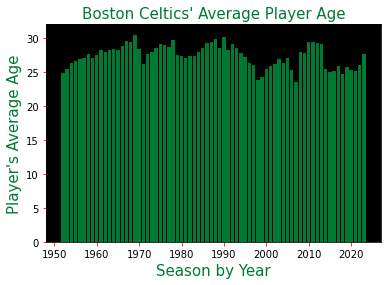

In [34]:
plt.bar(bcage['season'], bcage['age'], color = '#007A33')
plt.title("Boston Celtics' Average Player Age", fontsize = 15, color = '#007A33')
plt.xlabel('Season by Year', fontsize = 15, color = '#007A33')
plt.ylabel("Player's Average Age", fontsize = 15, color = '#007A33')
ax = plt.gca()
ax.set_facecolor('black')
ax.tick_params(axis = 'both', color = 'red')